In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import linalg
import numpy as np

In [2]:
# define data here
n_samples = 8
# n_features=3 is maximum for plotting the data
n_features = 3 
centers = 3
cluster_std = 0.2

In [3]:
x, y = datasets.make_blobs( n_samples, n_features, centers=centers, cluster_std=cluster_std )
# order X by cluster groups
nx = []
ny = []
for c in range( centers ):
    for i in range( n_samples ):
        if y[i] == c:
            nx.append( x[i] )
            ny.append( y[i] )
x = np.array( nx )
y = np.array( ny )

x, y

(array([[-5.7822716 ,  2.50310214,  8.72771561],
        [-5.65359881,  2.68549046,  8.31088609],
        [-5.3690772 ,  2.40984069,  8.51781178],
        [-5.68303893,  4.24736124,  3.07234497],
        [-5.09758988,  4.19400147,  3.3624496 ],
        [-5.40747019,  4.05020172,  2.91167319],
        [ 2.82023672, -6.58980575,  2.03200558],
        [ 3.25589762, -7.09241981,  2.59022398]]),
 array([0, 0, 0, 1, 1, 1, 2, 2]))

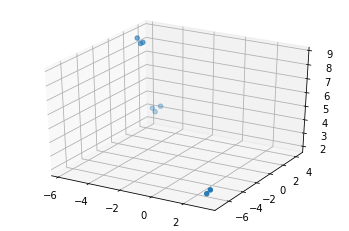

In [4]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

x_vals = x[:, 0]
y_vals = x[:, 1]
z_vals = x[:, 2]
ax.scatter( x_vals, y_vals, z_vals )
plt.show()

In [10]:
df = pd.DataFrame( x )
smm = np.array( squareform( pdist( df ) ) )

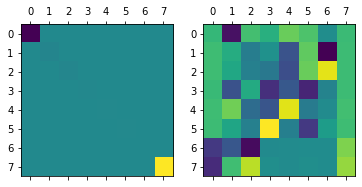

(array([-13.75105781,  -0.50128564,  -0.43951093,  -0.24342031,
         -0.15986663,  -0.11852338,  -0.02739794,  15.24106262]),
 array([[ 2.59811763e-01, -6.48609447e-01,  3.10637173e-01,
          2.10713055e-01,  4.15855529e-01,  3.42050328e-01,
          4.30179781e-03,  2.84526686e-01],
        [ 2.95569967e-01,  1.90771502e-01, -9.50475040e-02,
          2.45213802e-02, -3.41991932e-01,  3.92675974e-01,
         -7.15417626e-01,  2.89195472e-01],
        [ 2.95125127e-01,  1.57191036e-01, -7.62217645e-02,
         -1.29830672e-01, -3.64369334e-01,  4.17152064e-01,
          6.89428715e-01,  2.88848693e-01],
        [ 2.78161819e-01, -3.44035776e-01,  1.80059648e-01,
         -5.17625515e-01, -3.13747618e-01, -5.64911614e-01,
         -6.25050016e-02,  2.87120467e-01],
        [ 2.96465056e-01,  4.34268735e-01, -2.00024226e-01,
         -3.27251292e-01,  6.86590256e-01, -1.07289666e-01,
         -9.91949060e-03,  3.05614772e-01],
        [ 2.87776839e-01,  1.46073632e-01, -7.9273

In [11]:
w, v = np.linalg.eigh( smm )

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(np.diag(w))
ax2.matshow(v)
plt.show()

w, v

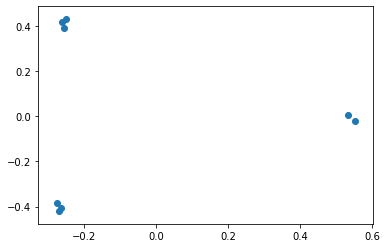

In [7]:
cut_v = v[:, 0:2]
# plt.matshow( nv )
# plt.show()

new_coordinates = []
for i in range( n_samples ):
    new_coordinates.append( cut_v[i, :].tolist() )
new_coordinates = np.array( new_coordinates )

x_vals = new_coordinates[:, 0]
y_vals = new_coordinates[:, 1]

plt.scatter( x_vals, y_vals )
plt.show()

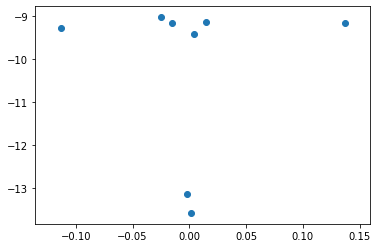

In [9]:
evalues = w[n_samples-2:]
evector = v[:, n_samples-2:]

evalues *= np.sqrt(1/2)
evalues = np.diag( evalues )

x = evector @ evalues

x_vals = x[:, 0]
y_vals = x[:, 1]

plt.scatter( x_vals, y_vals )
plt.show()